# The multiple linear regression model

One of the simplest models of data analysis for numerical variables is the linear regression model. Usually, in introductory statistics courses of an undergraduate course, the linear regression model with one independent variable is discussed. We consider the more general case of the linear regression model with multiple (for us $p$ variables) independent variables:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon =  \boldsymbol{\beta}^T \boldsymbol{x} + \epsilon
$$

with $ \boldsymbol{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{pmatrix}$ and $ \boldsymbol{x} = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_p \end{pmatrix}$ 

```{note}
Notation: In introductory statistics courses, we often distinguish between the random variable $Y$ and a realization $y$ by using upper and lower case. To keep the notation as streamlined as possible, we dispense with this convention and infer from the context whether we are dealing with the concept of a random variable or a realization of a variable. In addition, I more often use vector or matrix notation to keep formal representations compact. Bold lowercase letters correspond to vectors, uppercase letters correspond to matrices. 
```

As the name implies, only linear relationships can be captured by the linear regression model. I.e. in the case of the simple linear regression the function corresponds to a straight line, with two variables to a plane and in the general case to a so-called hyperplane. It is characteristic for the linear relationship that the increase by one unit of an independent variable always leads to a constant increase of the dependent variable, regardless of which value the independent variable just takes in its value range. For example, the sales $y$ of a company always increase by $\beta x $, regardless of whether $x$ is a small value or a large value. 

Nevertheless, by choosing the parameters $\boldsymbol{\beta}$ the model can be calibrated. In the lower cell we see the influence of the constant $\beta_0$, by which there is a paralell shift of the line in the simple regression model. In addition, the slope of the straight line can be manipulated by the choice of $\beta_1$. The latter is true for continuous or ordinal independent variables. If $x$ is a categorical variable, the straight line is again shifted parallel up or down. The value of the $\beta_j$ parameters allows conclusions about the possible influence of the respective independent variables. For example, if the value is $0$, then no influence of the respective variable can be assumed. Positive (negative) values, on the other hand, are an indication of a possible relationship. For the sake of completeness, it should be mentioned that the model is only complete with an assumption about the residuals $\epsilon$. This assumption affects the statistical inference of the estimated influences. In this course, however, we focus less on the statistical inference and more on the estimation of the point estimators of the parameters, which is why we do not go into detail about the assumption on $\epsilon$ and the associated probability theory implications. 

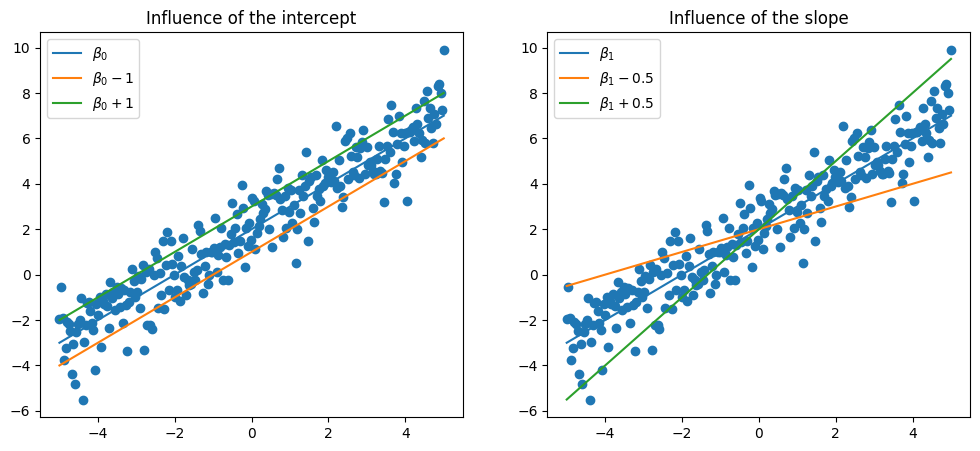

In [1]:
import numpy as np
import matplotlib.pylab as plt

b0 = 2.
b1 = 1.

x1 = np.linspace(-5, 5, 250)
e = np.random.normal(size = 250)

y1 = b0 + b1*x1 + e

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

axs[0].scatter(x1, y1)
axs[0].plot(x1, b0 + b1*x1, label = r"$\beta_0$")
axs[0].plot(x1, b0 - 1. + b1*x1, label = r"$\beta_0 - 1$")
axs[0].plot(x1, b0 + 1. + b1*x1, label = r"$\beta_0 + 1$")
axs[0].legend()
axs[0].set_title("Influence of the intercept")

axs[1].scatter(x1, y1)
axs[1].plot(x1, b0 + b1*x1, label = r"$\beta_1$")
axs[1].plot(x1, b0 + (b1 - 0.5)*x1, label = r"$\beta_1 - 0.5$")
axs[1].plot(x1, b0 + (b1 + 0.5)*x1, label = r"$\beta_1 + 0.5$")
axs[1].legend()
axs[1].set_title("Influence of the slope")
plt.show()

It should be noted that the regression model can also be used to represent non-linear relationships if the variables are transformed in a non-linear way. For example, if we suspect a more quadratic relationship between the $x$ and $y$, we can include $x^2$ in the model. The effect on the functional form of the model can be observed in the next cell. This approach is the polynomial regression, where of course higher polynomials can be included as a function. Here, however, we already deviate from the traditional linear regression model. The polynomial regression is one of several alternatives to the linear regression model, which creates more flexibility by increasing the complexity of the model. However, this is also often associated with challenges that will be discussed later in the course.

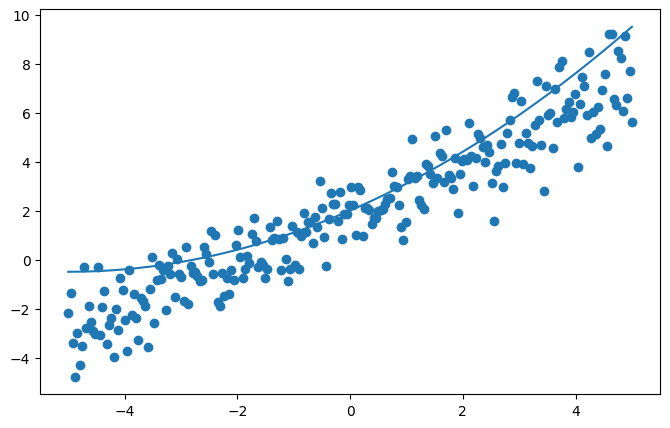

In [2]:
import numpy as np
import matplotlib.pylab as plt

b0 = 2.
b1 = 1.

x1 = np.linspace(-5, 5, 250)
e = np.random.normal(size = 250)

y1 = b0 + b1*x1 + e

fig, axs = plt.subplots(figsize = (8, 5))

axs.scatter(x1, y1)
axs.plot(x1, b0 + b1 * x1 + 0.1*x1**2)
plt.show()

## Training the linear regression model

In the previous section we have already briefly mentioned that the values of the parameters $\boldsymbol{\beta}$ are decisive for the interpretation and analysis of possible influences of the independent variables. The important question related to this is what are reasonable values for $\boldsymbol{\beta}$ given the data? Since the model is supposed to represent the real-life relations as well as possible, the data of a sample are usually used to estimate the model parameters in such a way that the given sample is explained as well as possible by the model. In the best case, a model is obtained in this way that works equally well for new samples. If this succeeds, one can assume that the model is generally suitable to represent the relationships for the task at hand. 

In order to fit a model to given data as well as possible, it is attempted to set the parameters in such a way that the predictions of the model are as close as possible to the real observations. If this succeeds, it can be said that the model explains the occurrence of the data as well as possible. To learn how this process is mastered, we start with a simple (but unrealistic) example. Given an observation $y = 3$ with the observation of an independent variable $x = 2$. Let the equation of the regression line be: 

$$
f(x) = \beta \cdot x 
$$

This is a straight line through the origin of the coordinate system whose slope can be influenced by the choice of $\beta$.

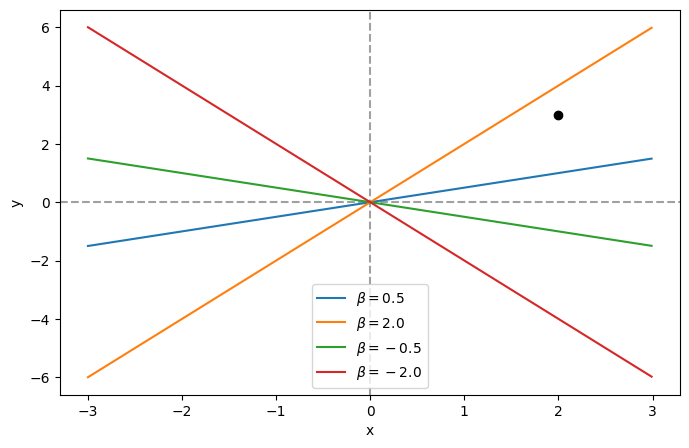

In [3]:
import matplotlib.pylab as plt
import numpy as np


x_range = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(2, 3, color = "black")
ax.axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
ax.axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
ax.plot(x_range, 0.5 * x_range, label = r"$\beta = 0.5$")
ax.plot(x_range, 2.0 * x_range, label = r"$\beta = 2.0$")
ax.plot(x_range, -0.5 * x_range, label = r"$\beta = -0.5$")
ax.plot(x_range, -2.0 * x_range, label = r"$\beta = -2.0$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In order to check how close the forecast is to the actual value, it makes sense to first determine the difference $y - f(x)$. However, since one is primarily interested in how much the deviation is rather than whether one is just underestimating or overestimating the actual value, the absolute value $|y - f(x)|$ or the squared deviation $\left(y - f(x)\right)^2$ is rather used to quantify how far apart the realization and estimation of the model are. The quadratic deviation has more mathematically useful properties, which is why it is most often used. Since the estimate of the model depends on the parameter $\beta$, we want to define the cost or loss function:

$$
L\left(y, f_{\beta}(x) \right) = \left(y - f_{\beta}(x)\right)^2
$$

In our example we can directly insert the values:

$$
L\left(y, f_{\beta}(x) \right) = \left(3 - \beta \cdot 2\right)^2
$$

In the graph below we see the relationship between different values for $\beta$ and the loss function $L\left(y, f_{\beta}(x) \right)$. It is desirable that the value of $L\left(y, f_{\beta}(x) \right)$ is as small as possible, since this results in the smallest possible deviation between the forecast of the model and the realized value. Mathematically, we are thus in an optimization, or more precisely, minimization problem, in which it is a matter of minimizing the function $L\left(y, f_{\beta}(x) \right)$ by the choice of $\beta$. For our example we can solve this problem relatively easily, in which we determine possible extreme points of the function by building the first derivative and setting it to zero and in the next step check by the second derivative whether the extreme point is a minimum, maximum or a turning point.

$$
\begin{aligned}
\frac{\partial L}{\partial \beta} = 2 (3 - \beta \cdot 2) \cdot (-2) \stackrel{!}{=} 0 \\
-12 + 8 \cdot \beta = 0 \\
\beta = \frac{3}{2}
\end{aligned}
$$

$$
\frac{\partial^2 L}{\partial^2 \beta} = 8 > 0
$$

We see that the solution $\beta = \frac{3}{2}$ is a minimum. The corresponding line in our example goes directly through the point $(2, 3)$ which gives us an exact prediction for this one observation.

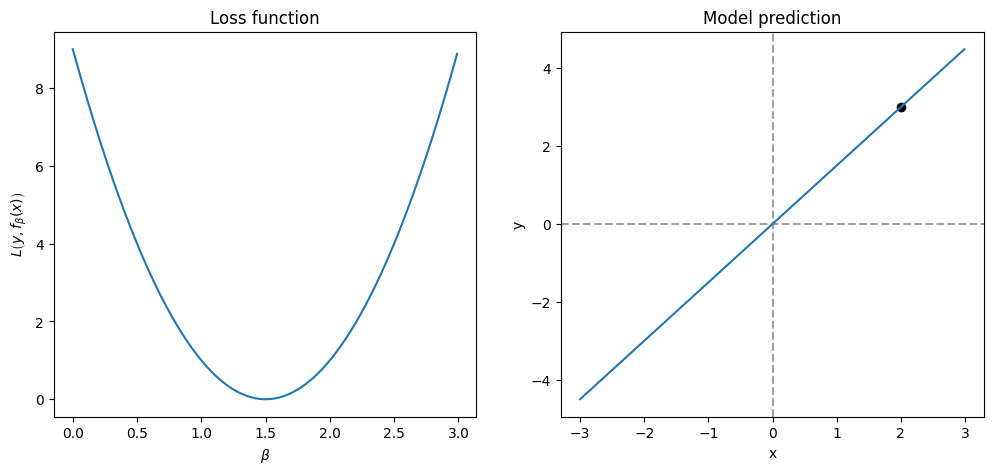

In [4]:
import matplotlib.pylab as plt
import numpy as np


x = 2
y = 3
L = lambda beta: (y - beta * x)**2
beta_range = np.arange(0, 3, 0.01)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(beta_range, L(beta_range))
axs[0].set_xlabel(r"$\beta$")
axs[0].set_ylabel(r"$L\left(y, f_{\beta}(x) \right)$")
axs[0].set_title("Loss function")

x_range = np.arange(-3, 3, 0.01)
axs[1].scatter(2, 3, color = "black")
axs[1].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].plot(x_range, 1.5 * x_range, label = r"$\beta = 1.5$")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("Model prediction")

plt.show()

In the realistic case with multiple data points, it is usually not possible to generate perfect predictions of the model, no matter how well the parameters of the model are chosen. However, the parameters of the model can be determined using the same logic as in the previous example. Let us add another data point $(x_2 = 3, y_2 = 2)$ to our sample next to the point $(x_1 = 2, y_1 = 3)$. The loss function becomes:

$$
\begin{split}
L\left(y, f_{\beta}(\boldsymbol{x}) \right) & = \frac{1}{2} \left( \left(y_1 - f_{\beta}(x_1)\right)^2 +  \left(y_2 - f_{\beta}(x_2)\right)^2 \right) = \\
& = \frac{1}{2} \sum_{i = 1}^2 \left(y_i - f_{\beta}(x_i)\right)^2 = \\
& = \frac{1}{2} \sum_{i = 1}^2 \left(y_i - \beta x_i\right)^2 
\end{split}
$$

Even if the representation becomes somewhat more formal by the sum sign, a possible minimum can be determined as before by the first derivative:

$$
\begin{aligned}
\frac{\partial L}{\partial \beta} = \frac{1}{2} \sum_{i=1}^2 2 \left(y_i - \beta x_i\right) \cdot (-x_i) = \sum_{i=1}^2 \left(y_i - \beta x_i\right) \cdot (-x_i) \stackrel{!}{=} 0 \\
\sum_{i=1}^2 - x_i y_i + \sum_{i=1}^2 \beta x_i^2 = 0 \\
\beta \sum_{i=1}^2 x_i^2 = \sum_{i=1}^2 x_i y_i  \\
\beta = \frac{\sum_{i=1}^2 x_i y_i }{\sum_{i=1}^2 x_i^2 }
\end{aligned}
$$

In our example, this results in the value $\beta = \frac{12}{13}$. The lower graph visualizes that in this way a straight line results, which runs between the two points. The model tries to be as close as possible to both points. 

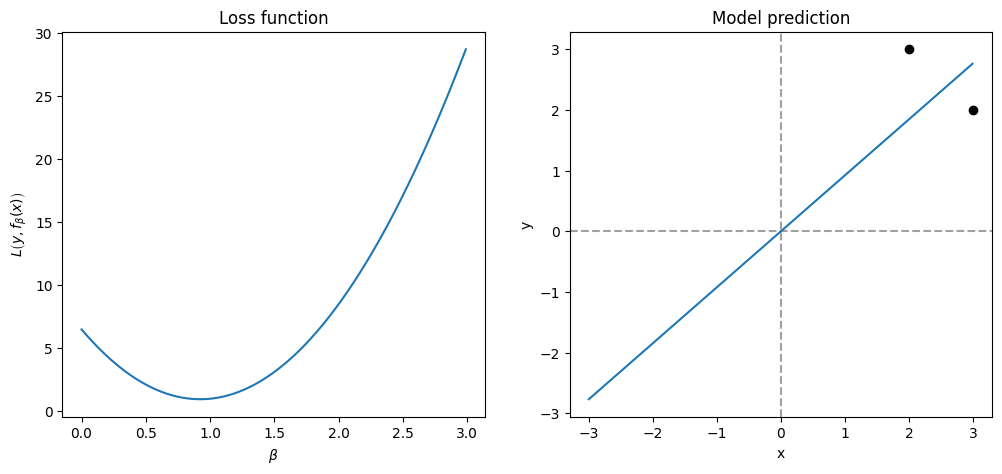

In [5]:
import matplotlib.pylab as plt
import numpy as np

x = np.array([2., 3.])
y = np.array([3., 2.])

L = lambda beta: np.mean((y - beta * x)**2)
beta_range = np.arange(0, 3, 0.01)
losses = np.array([L(beta_) for beta_ in beta_range])

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(beta_range, losses)
axs[0].set_xlabel(r"$\beta$")
axs[0].set_ylabel(r"$L\left(y, f_{\beta}(x) \right)$")
axs[0].set_title("Loss function")

x_range = np.arange(-3, 3, 0.01)
axs[1].scatter(x, y, color = "black")
axs[1].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].plot(x_range, 12/13 * x_range, label = r"$\beta = 1.5$")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("Model prediction")

plt.show()

We note that the fitting of the model of the data is done by mathematical optimization. Here it is important to understand that the data points of the sample $(x_1, y_1), ..., (x_n, y_n)$ are invariant values and the fitting of the model is done by choosing the parameters. In the general case with multiple data points and a regression problem, the common loss function is:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \frac{1}{n} \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2
$$

or since for the identification of the minimum the constant $\frac{1}{n}$ is insignificant, sometimes also:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2
$$

Even if the minimization for the general case becomes somewhat more difficult than in our simple examples, all values for $\boldsymbol{\beta}$ can be determined in an analytical way for the linear regression model. This solution is implemented in all common statistical packages and programs, and we will omit the formal presentation here. Lastly, it should be noted that the parameters determined by minimizing the loss function usually differ per sample. Therefore, the estimated parameters are usually given an umbrella symbol such as $\hat{\boldsymbol{\beta}}$ here to make it clear that they are estimates from the sample and not the true values of the whole population. 

## Estimation uncertainty

Before we go into a specific example, let's look a little more closely at the aspect of estimation uncertainty. In some cases, it may be theoretically possible to have access to the data of the entire population and thus determine the true value of a parameter. For example, it is theoretically possible to determine the average height of all adult citizens in a country. However, this often fails due to practical aspects of data collection and questions of economic benefit, as the collection of all data often involves high costs. Accordingly, as soon as one does not resort to all values of the population, but tries to determine the unknown value of the population through a random sample, the uncertainty in the estimated value arises due to the randomness of the sample collection. If a random sample is drawn more often, the random realizations and thus the estimated parameters per sample will differ. If we look at the highly simplified example in the bottom cell, we see that when random draws are made from a population and the expected value is estimated by the arithmetic mean, there will be varying values that always deviate from the true value. Such behavior always exists when the parameters of models are estimated from samples. The more the estimated parameters vary, the higher the statistical uncertainty and the associated inference. How much the parameters vary can be quantified by the standard errors. These are used to calculate important statistical ratios such as the confidence interval and the p-value.

In [6]:
import numpy as np

n = 5

population = np.array([22, 21, 25, 27, 22])
print("The population values are:")
print(population)
print(" ")
idx = np.arange(1, n) - np.tri(n, n-1, k=-1, dtype=bool)

sample_means = population[idx].mean(axis = 1)
true_mean = population.mean()

print("The true mean of the population is:")
print(true_mean)
print(" ")
print("Sample means with leave one out drawing are:")
print(sample_means)

The population values are:
[22 21 25 27 22]
 
The true mean of the population is:
23.4
 
Sample means with leave one out drawing are:
[23.75 24.   23.   22.5  23.75]


Frequentist statistical hypothesis tests attempt to incorporate the uncertainty of the parameter estimate when testing a hypothesis. For example, in the null hypothesis, if one assumes that the variable $x_1$ has no non-zero influence on the dependent variable, then due to the randomness of sampling, it is still possible that $\hat{\beta}_1$ takes on a non-zero value, even if the true value is $\beta = 0$. However, if one can determine the standard error of the parameter estimator, one is able to set limits above which the estimated random value of a sample for a given hypothesis seems very implausible. In addition to classical tests, confidence intervals are often included with estimated parameters. The higher the standard error of an estimator, the wider the interval, the less concrete the inference about the estimated influence of the associated variable. The exact functioning of hypothesis tests and the handling of confidence intervals should be content of introductory statistics courses of your studies, but with this discussion I would like to sensitize you to the importance of the statistical uncertainty of estimated parameters of a model. When analyzing a model, the focus should not only be on the estimated value, but also on its uncertainty.

In the next two cells you can see the excerpt of a data set where we want to analyze a possible influence of the advertising channel on sales. We use the OLS class of the statsmodels package to estimate the linear regression parameters of this data set. In the associated output, we see that a positive influence of television and rate advertising on sales is measurable. The sign of the news variable is negative, but we can see from the p-value that we cannot assume a zero different influence of this variable. This means that, at least from a statistical point of view, it does not make sense to interpret the negative sign as a negative influence of the variable. In the standard, for this output, each variable is tested individually by a t-test for non-zero statistical significance. This means that for each variable (and also for the constant) the null hypothesis is $\beta = 0$. Next to the p-values, the limits of the confidence intervals are given. In addition, you will find further information, such as the number of observations ($n = 200$), the F-test and measures of goodness such as the $R^2$, log-likelihood, AIC and BIC.  

In [7]:
import pandas as pd


advertising_df = pd.read_csv("../data/Advertising.csv", index_col= "Unnamed: 0")
advertising_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
import statsmodels.api as sm

X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        11:58:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

To demonstrate again how you can imagine the randomness of the estimated parameters, we perform a small experiment in the bottom cell for this data set. We treat the data set as a whole population and draw samples of size $n_{\text{sample}} = 100$ from this population several times. Each time we estimate the parameters of the regression function and record them in a table. After 100 draws, we look at the histograms of the estimated parameters across all sample draws. We can see that the estimated values of the draws are often close to the values of the whole sample, but in some cases there are larger deviations. In our studies, we usually work with one sample, i.e., we base our results only on an estimated parameter combination of these distributions. This should be clarified once again with this example.

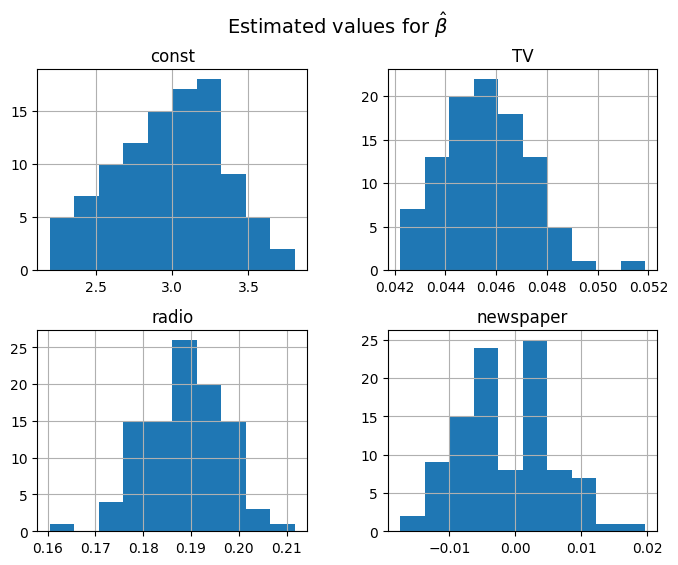

In [9]:
import matplotlib.pylab as plt

n_draws = 100

beta_hats = []
for _ in range(n_draws):
    advertising_df_subsample = advertising_df.sample(100, replace = False)
    X = advertising_df_subsample.loc[:, ["TV", "radio", "newspaper"]]
    y = advertising_df_subsample.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    beta_hats.append(results.params.values)
    
beta_hats_df = pd.DataFrame(np.array(beta_hats), columns=results.params.index)

fig, axs = plt.subplots(2, 2, figsize = (8, 6))
beta_hats_df.hist(ax = axs)
fig.suptitle(r"Estimated values for $\hat{\beta}$" , fontsize=14)
plt.show()

## Model quality

How good the model is at explaining the independent variable is best told by relative comparison. Good regression models should be able to make better predictions using the information from the independent variable than a model that cannot use the information from the independent variable. For example, a naive prediction and appropriate benchmark for a regression problem would be the arithmetic mean of the realizations of the dependent variable $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$. The better a model, the smaller should be, on average, the squared or the absolute deviations between realizations and forecasts. The forecasts of the linear regression model are given by the estimated regression function $\boldsymbol{\hat{\beta}}^T \boldsymbol{x}$:

We define the mean-squared-error (MSE):

$$
MSE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2
$$

As an alternative, we define the mean-absolute-error (MAE):

$$
MAE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n |y_i - \hat{y}_i|
$$

where $\hat{y}$ represents the predicted value that can be generated by a different models. In comparison, the MAE is less affected by isolated high error forecasts. In both cases, the ratio from the respective metric for the regression model and for the unconditional forecast (e.g., $\bar{y}$) can be considered. For example, let us determine:

$$
\frac{\sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2}{\sum_{i = 1}^n \left(y_i - \bar{y}\right)^2} 
$$

the smaller the value, the more advantageous the regression model. This means that with the model and its use of the independent variables, the realizations can be better predicted (and thus better explained) than without the information of the independent variables. Of course, two models can also be compared in this way, each using the information of the independent variable. Merely looking at the MSE and MAE alone is usually not very informative, since all we know is that a value close to zero is a good sign. However, as for the estimation of zero different values, it strongly depends on the numerical range of the dependent variable, which can be considered as a lower value. Therefore, it is better to always include a meaningful benchmark when evaluating the model. For the linear regression model, a normalized variant of the goodness-of-fit measure is often used, the coefficient of determination $R^2$, which is given by:

$$
R^2 = 1 - \frac{\sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2}{\sum_{i = 1}^n \left(y_i - \bar{y}\right)^2} 
$$

The range of values lies between $0$ and $1$, whereby higher values indicate a better explanatory quality of the linear regression model. If the assumption of a linear relationship between the independent and the dependent variable is violated, however, values smaller than $0$ can also result. Since the model quality usually increases with the inclusion of further independent variables, the adjusted coefficient of determination should rather be used for the output of the linear regression, which corrects this property. 

In addition to quantitative model quality, it is often useful to generate a scatterplot where realizations are plotted on the x-axis and predictions are plotted on the y-axis. A perfect model would produce points along a diagonal, points above the diagonal representing overestimates and points below representing underestimates of the model. Another informative scatterplot is the visualizations of the variances $\epsilon = y - \hat{y}$ across all observations. This plot can be used to visually check whether there are systematic deviations across the observations.

In the bottom cell, we determine the ratio of the MSE for the linear regression model and $\bar{y}$. In addition, we look at the two graphs mentioned above. Overall, the model seems to explain the sales values relatively well and, more importantly, much better than the unconditional forecast $\bar{y}$. However, it seems that the model provides better forecasts for higher sales values than for smaller values and, in particular, sales values in the middle range are systematically overestimated. These findings suggest that the linear relationship between the independent variables and the dependent variable may not fully reflect reality and that a model that is able to represent non-linear relationships may be more appropriate.

The mean squared error ratio of the linear regression model and the arithmetic mean of sales is: 0.1028


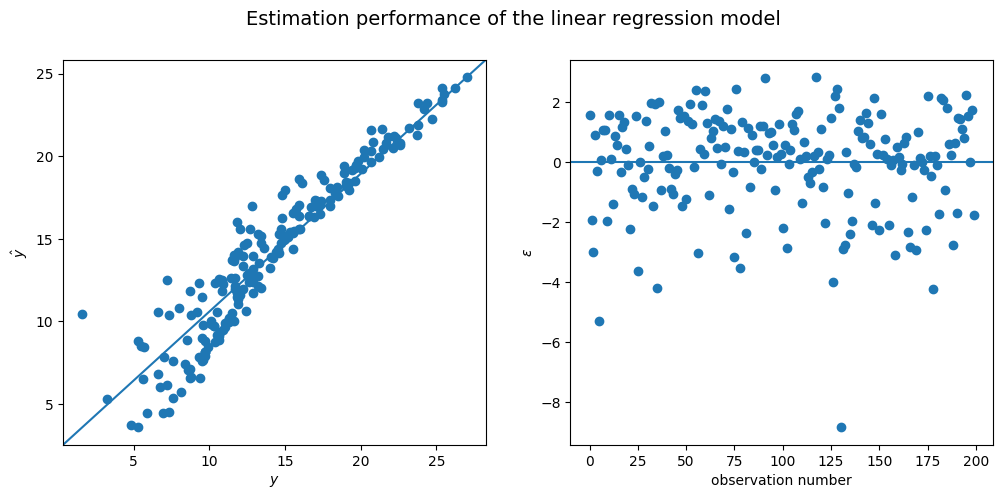

In [10]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt


X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

y_hat = results.predict(X)

mse_model = mean_squared_error(y, y_hat)
mse_benchmark = mean_squared_error(y, [y.mean()]*y.shape[0])

print(f"The mean squared error ratio of the linear regression model and the arithmetic mean of sales is: {mse_model / mse_benchmark:.4f}")

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(y, y_hat)
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes)
axs[0].set_xlabel(r"$y$")
axs[0].set_ylabel(r"$\hat{y}$")
axs[1].scatter(range(advertising_df.shape[0]), y - y_hat)
axs[1].axhline(0)
axs[1].set_xlabel(r"observation number")
axs[1].set_ylabel(r"$\epsilon$")
fig.suptitle(r"Estimation performance of the linear regression model" , fontsize=14)
plt.show()

## Assessment of the independent variables

Once the model has been estimated and its goodness of fit has been found to be sufficient, the results of the parameter estimation can be used to identify the variables with the greatest influence on the dependent variable. The estimated parameters of the advertising regression model are $\hat{\beta}_{\text{TV}} = 0.0458$, $\hat{\beta}_{\text{radio}} = 0.1885$, $\hat{\beta}_{\text{newspaper}} = -0.0100$. Based on these values, one would initially assume that the greatest influence comes from radio advertising, since an increase in this by one unit is accompanied by the greatest increase in the dependent variable. However, it should be noted that the numerical range of realizations of this variable may differ from those of the others, making the one-unit changes not comparable. If we look at the numerical range of the independent variables in the lower cell, this is exactly the case. In order to truly compare the estimated parameters and their impact on the dependent variable, they must first be brought to comparable ranges of values. If the model is estimated with these standardized variables, the respective influence of the independent variable can be compared on the basis of the estimated parameter.

In [11]:
advertising_df.loc[:, ["TV", "radio", "newspaper"]].describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In the bottom cell, we estimate the model again using standardized values of the independent variables. The estimated parameters are $\hat{\beta}_{\text{TV}} = 3.9193$, $\hat{\beta}_{\text{radio}} = 2.7921$, $\hat{\beta}_{\text{newspaper}} = -0.0225$. Using these values, we can identify the largest impact due to TV advertising, which brings a $3.9193$ increase in sales when TV advertising spending is increased by one standard deviation.

In [12]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = ["TV", "radio", "newspaper"], index = X.index)

y = advertising_df.loc[:, "sales"]
X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        11:58:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0

## Variable selection

So far, we have assumed that all available variables are included in the model. However, this may not always be advantageous. In particular, if individual independent variables do not contribute positively to the improvement of the model, it makes little sense to include these variables in the model. In addition, problems can also arise if independent variables are highly correlated (collinearity). So which selection is the best for the model. With a small number of independent variables, models can theoretically be estimated for all variable combinations and compared based on their goodness of fit. However, for $p$ independent variables $2^p$ combination possibilities exist, so one quickly reaches the limits of computational implementation with this approach. In practice, models with a subset of all independent variables are usually determined sequentially. This can be done either in "forward" or "backward" manner. In forward selection, one starts with a model without independent variables and estimates models with one variable each. The variable that improves the quality of the model the most is included in the model first. Subsequently, models are estimated and evaluated again, each time with the addition of a variable other than the one already selected. The variable that brings the greatest improvement is again included. The process is terminated, if by the renewed addition of a variable no more significant improvement develops. What is considered a significant improvement is determined by the user. In backward selection, a model with all variables is estimated in the first step. Subsequently, models are estimated with the respective omission of a variable. The variable whose omission reduces the model quality the least is removed from the model. This process is repeated until the reduction in model goodness is deemed too high.

As an example, we consider the forward selection for the Advertising dataset. We use the $R^2$ as a metric to quantify the goodness. In the first step, we select the TV variable. Next, we see an increase in $R^2$ of $0.2853$ when the radio variable is included in the model. Including the newspaper variable would not increase the $R^2$ any further, so there is no need to include this variable in the model.

In [13]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import numpy as np

variables = ["TV", "radio", "newspaper"]

r2_scores = []
for variable in variables:
    X = advertising_df.loc[:, [variable]]
    y = advertising_df.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    y_hat = results.predict(X)
    r2_scores.append(np.round(r2_score(y, y_hat), 4))

print(f"Variable names: {variables}")
print("R^2 values for univariate regressions:")
print(r2_scores)
print(f"Variable with the highest R^2 value: {variables[np.argmax(r2_scores)]}")
print("Continue with the selection of the next variable:\n")
variables = ["radio", "newspaper"]

r2_scores = []
for variable in variables:
    X = advertising_df.loc[:, ["TV", variable]]
    y = advertising_df.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    y_hat = results.predict(X)
    r2_scores.append(np.round(r2_score(y, y_hat), 4))

print(f"Remaining variable names: {variables}")
print("R^2 values for regressions:")
print(r2_scores)
print(f"Variable with the highest R^2 improvement: {variables[np.argmax(r2_scores)]}")

Variable names: ['TV', 'radio', 'newspaper']
R^2 values for univariate regressions:
[np.float64(0.6119), np.float64(0.332), np.float64(0.0521)]
Variable with the highest R^2 value: TV
Continue with the selection of the next variable:

Remaining variable names: ['radio', 'newspaper']
R^2 values for regressions:
[np.float64(0.8972), np.float64(0.6458)]
Variable with the highest R^2 improvement: radio


## Deviations of the model assumptions

The linear regression model uses simplifying assumptions. We want to discuss these again in conclusion, in order to sensitize with it, whereby wrong estimations can originate under the use of the linear regression model. Specifically, the assumptions are as follows:

* Linear relationship between the independent and the dependent variable.
* Normal distribution of the dependent variable
* Homoscedasticity 
* Independent error terms
* Low correlation of the independent variables (low or no multicollinearity).

**Linear relationship**

The linear regression line establishes a linear relationship between the independent and dependent variable. This means that the change of an independent variable by one unit always leads to a constant change of the dependent variable. This is not always realistic. For example, one may assume that the increase for advertising expenses above a certain amount will lose the additional benefit of increased sales. In this case, it would not be the case that the increase in advertising expenditure always leads to the same increase in sales, but rather that the increase in sales depends on how high the expenditure on advertising measures already is. Another assumption of the classical linear regression model is that the additivity of the independent variables. This means that the influence of each independent variable is independent of the other variables. This changes if, for example, interaction effects are included. With an interaction effect one is interested in interactions of the influence of several variables. For the example of the advertisement data set, we have seen after variable selection that:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \beta_2 x_{\text{radio}} + \epsilon
$$

is a good model. If we include the interaction term, the model changes to:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \beta_2 x_{\text{radio}} + \beta_3 x_{\text{TV}} x_{\text{radio}} + \epsilon
$$

Alternatively, we can make this model either to:

$$
y = \beta_0 + \left(\beta_1 + \beta_3 x_{\text{radio}} \right) x_{\text{TV}} + \beta_2 x_{\text{radio}} + \epsilon
$$

or to:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \left(\beta_2 + \beta_3 x_{\text{TV}} \right) x_{\text{radio}} + \epsilon
$$
 
Depending on the variant of the model, it becomes apparent that the influence of TV advertising or radio advertising depends on the other type of advertising, and thus the original characteristic of additivity disappears. In the bottom cell, we estimate the model with the interaction term. We see from the output that the interaction term has a significantly non-zero positive impact. In addition, the coefficient of determination improves. The positive value can be interpreted that the positive influence of one advertising measure increases when the other advertising measure is increased.

In [14]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt


X = advertising_df.loc[:, ["TV", "radio"]]
X.loc[:, "TV_radio"] = X.TV * X.radio
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          6.68e-146
Time:                        11:58:19   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

In addition to including interactions (and thus relaxing the additivity assumption), the linear regression model can also be fitted to represent possible non-linear relationships. Possible solutions are given by adding polynomials or by splines. However, the modeling of non-linear correlations is done in a later chapter.

**Normal distribution assumption**

So far we did not discuss the difference of the regression model:

$$
y = \boldsymbol{\beta}^T \boldsymbol{x} + \epsilon
$$

and the regression line:

$$
y = \boldsymbol{\beta}^T \boldsymbol{x} 
$$

any further. By the regression line only the conditional expected value for $y$ is determined. Conditional on the information of the independent variables $\boldsymbol{x}$, what value do we expect for $y$. However, in the traditional regression model, the assumption is often still made that $\epsilon$ is normally distributed $\epsilon \sim N(0; \sigma^2)$. It follows that $y$ is also normally distributed, $y \sim N(\boldsymbol{\beta}^T \boldsymbol{x} ; \sigma^2)$. Thus, through the model, not only can the expected value be estimated, but we can also perform calculations for other parts of the distribution. For example, given values of the independent variables, we can determine the probability of falling below or exceeding a given value for $y$. These estimates are only accurate if the normal distribution assumption is not violated. For this purpose, the Jarque-Bera test with the null hypothesis of a normal distribution is often shown in the output of the model. In our example, this assumption would be rejected (using a common significance level such as $0.01$ or $0.05$). In principle, this is less problematic for the estimation of the parameters, but no statements should be made based on the normal distribution. The assumption of normal distribution is made relatively often in the literature for various models, although in reality it often has to be discarded for empirical data. Its nevertheless frequent use often has something to do with the mathematically pleasing properties of the normal distribution.

**Homoskedasticity**

The property of homoscedasticity arises from the assumption that the variance of all residuals is equal $\epsilon \sim N(0; \sigma^2)$, if this is not true, individual observations $i$ exhibit different variances $\sigma_i^2$. In the cell below, you can see an example of simulated data whose variance increases with the independent variable. The corresponding residual plot is particularly meaningful here, as it gives a good graphical indication that the variances of the predictions vary in different ways. The good news is that the estimated parameters of the regression line can be further trusted since they are consistently unbiased, but attention should be paid to statistical inference in the presence of heteroscedasticity. The standard errors of the estimators tend to be underestimated, which can lead to erroneous inferences. Options for dealing with heteroskedasticity include adjusting the standard errors or adjusted estimation procedures such as the weighted least squares approach, in which the observations of the loss function are weighted inversely proportional to their variance. 


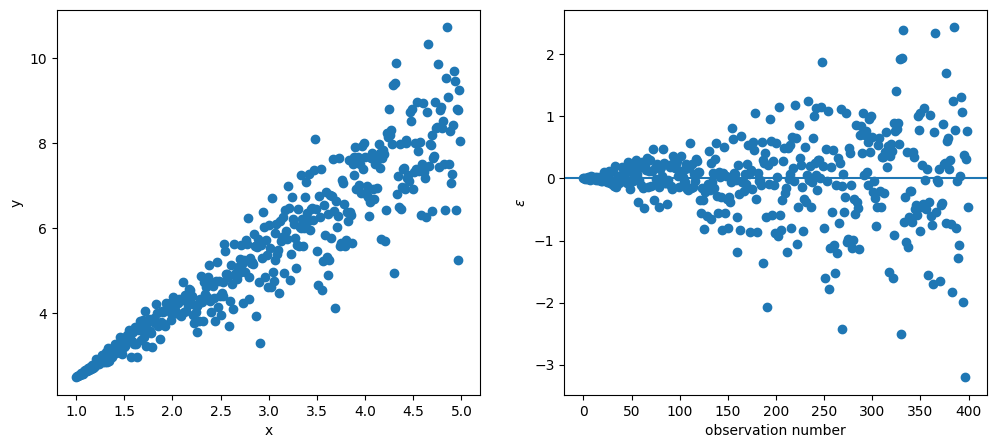

In [15]:
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import pandas as pd


# simulate data
beta_0, beta_1 = 1, 1.5
sigma_c = 1.

x = np.arange(1, 5, 0.01)
y = []
for i in range(len(x)):
    y.append(beta_0 + beta_1 * x[i] + np.random.normal() * sigma_c * 0.003 * (i+1))

df = pd.DataFrame({"x": x, "y": y})
X = df.x
y = df.y
X = sm.add_constant(X)

# estimate model
model = sm.OLS(y, X)
results = model.fit()
epsilon = y - results.predict(X)

# visualize residuals
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(x, y)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].scatter(range(len(df)), epsilon)
axs[1].axhline(0)
axs[1].set_xlabel(r"observation number")
axs[1].set_ylabel(r"$\epsilon$")
plt.show()

**Independent error terms**.

The assumption of independent error terms implies that there are no systematic relationships between the residuals $\epsilon$ of the individual observations. This assumption is often not met for time series data or clustered data. Similar to the presence of heteroskedasticity, the consequences primarily affect statistical inference, while the estimators of the regression lines remain asymptotically unbiased. Dealing with this can be done by adjusting the standard errors or by including adjusted models for the error terms. In economics, data are often available as time series. Here, non-zero autocorrelation can often be observed. Autocorrelation describes the linear relationship of successive values. The auto-covariance of a variable can be estimated by means of:

$$
\hat{\gamma}(h) = \frac{1}{T} \sum_{t = 1}^{T-h} \left(x_t - \bar{x}\right)\left(x_{t-h}  - \bar{x}\right)
$$

where $h$ describes the time interval of successive observations and $T$ the number of observations over time. If you compare this formula with the estimator of the covariance of two variables, you will see that the auto-covariance determines the correlation with the own values at $h$ time intervals. The normalized form of the auto-covariance is the auto-correlation, which is given by:

$$
\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}
$$

This value is in the interval $[-1, 1]$ and can be interpreted in an analogous way to the Bravais-Pearson correlation. If a non-zero auto-correlation is measured, it is useful to model current data points using past data.

**Multicollinearity

Finally, it can become problematic for the estimation of the linear regression model if independent variables show (high) dependencies. Intuitively, it becomes difficult to identify the individual influences of these variables separately in this way. In the extreme case of perfect linear dependence, mathematical problems also arise that make estimation impossible. It is therefore always a good idea to look at the correlations of the independent variables in the first step. In the cell below you can see the correlation matrix for our example data set. In this case, the correlation between the two most important variables is relatively low, which is why the aspect of multicollinearity is not relevant for this data set. If high correlations are found, a first simple help could be to remove one of the highly correlated variables from the model. Methodologically, the variance-inflation factor can be used to quantify how pronounced multicollinearity is for the existing data set.

In [16]:
advertising_df.drop(["sales"], axis = 1).corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


## Summary

Even though the linear regression model probably makes highly simplifying assumptions for reality in many cases, didactically it is a very good introduction to dependent variable modeling. We have looked at and discussed many details in more detail in this chapter, which we do retain for the upcoming models. However, it is true that many basic ideas, such as the mental distinction of the model and the estimation of the conditional expected value, exist in the same way for other and sometimes much more complex models. The most important aspects of this chapter for this course are:

* how is the model defined - from this it can be inferred what type of relationship is assumed between the dependent and independent variables
* how are the parameters of the model estimated - the use of a loss function that is minimized as the parameters change is very common for many different models
* what inferences can be made from the estimated model - how well can the model explain the data, what variables are important, what is their influence